low pass filter

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
#import pyplot.graph_objects as go

czyli zostawia częstotliwości poniżej podanej w cutoff

In [25]:
#filter requirements
T= 5  #sample period
fs= 30
cutoff=2  #desired cutoff frequency of the filter, Hz, slighly higher than actual 1.2 hz
nyq = 0.5 *fs  #Nyquist frequency
order = 2 #sin wave can ve approx represented as quadratic
n= int(T*fs)  #total number of samples


In [26]:
#create some sample data with noise
t = np.linspace(0, T, fs, endpoint=False)
sig= np.sin(1.2*2*np.pi*t)
noise= 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data=sig + noise

In [27]:
# filter implementation using scipy
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [30]:
# filter and plot the data
y = butter_lowpass_filter(data, cutoff, fs, order)

fig=go.Figure()

fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

AttributeError: 'Figure' object has no attribute 'add_trace'

In [13]:
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

# sin wave
sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise


def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()


IndexError: tuple index out of range

druga próba


In [2]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import scipy.fft

In [3]:
order = 5
sampling_freq = 30
cutoff_freq = 2
sampling_duration = 5
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)  #w=2pif
#signal = np.sin(2*np.pi*time) + 0.5*np.cos(6*2*np.pi*time) + 1.5*np.sin(9*2*np.pi*time)
signal = np.sin(2*np.pi*time) + 0.5*np.cos(6*2*np.pi*time) + 1.5*np.sin(9*2*np.pi*time)

C:\Users\Huawei\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


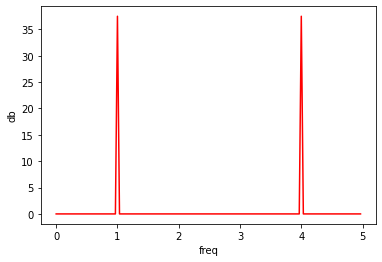

In [4]:
signal_fft= scipy.fft.fft(signal)
plt.plot(time, signal_fft, 'r-', label='fft_signal')
plt.xlabel("freq")
plt.ylabel("db")
plt.show()

In [24]:
normalized_cutoff_freq = 2 * cutoff_freq / sampling_freq
numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, normalized_cutoff_freq)

filtered_signal = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, signal)

C:\Users\Huawei\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


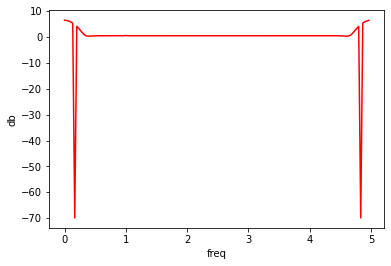

In [25]:
signal_fft_filtred= scipy.fft.fft(filtered_signal)
plt.plot(time, signal_fft_filtred, 'r-', label='fft_signal')
plt.xlabel("freq")
plt.ylabel("db")
plt.show()

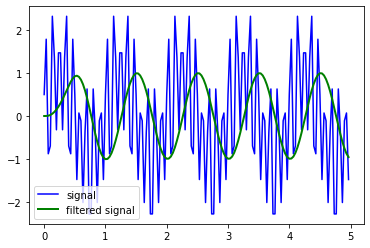

In [12]:
plt.plot(time, signal, 'b-', label='signal')
plt.plot(time, filtered_signal, 'g-', linewidth=2, label='filtered signal')
plt.legend()